
Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/
ćwiczenia.

# LAB1: Preprocessing danych
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

In [2]:
# --- Import potrzebnych bibliotek ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Konfiguracja wykresów
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

survived	Informacja, czy pasażer przeżył (0 = nie, 1 = tak).

pclass	Klasa biletu (1 = pierwsza, 2 = druga, 3 = trzecia).

sex	Płeć pasażera (male, female).

age	Wiek pasażera (lata, liczba zmiennoprzecinkowa).

sibsp	Liczba rodzeństwa i/lub małżonków podróżujących razem.

parch	Liczba rodziców i/lub dzieci podróżujących razem.

fare	Cena biletu (opłata).

embarked	Kod portu zaokrętowania (C, Q, S).

class	Klasa biletu w formie tekstowej (First, Second, Third).

who	Typ osoby (man, woman, child).

adult_male	Czy pasażer był dorosłym mężczyzną (True/False).

deck	Pokład pasażera (A–G, często brak danych).

embark_town	Pełna nazwa portu zaokrętowania (Cherbourg, Queenstown,
Southampton).

alive	Informacja o przeżyciu w formie tekstowej (yes/no).

alone	Czy pasażer podróżował sam (True/False).

In [3]:
# =============================================
# 1. Wczytanie danych
# =============================================
df = sns.load_dataset("titanic")

print("Pierwsze 5 wierszy:")
display(df.head(30))

print("\nInformacje o danych:")
print(df.info())

print("\nStatystyki opisowe:")
display(df.describe(include="all"))

Pierwsze 5 wierszy:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False



Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Statystyki opisowe:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Pierwszym krokiem analizy danych powinno być wizualne zapoznanie się ze zbiorem. Oczywiście w przypadku dużych zbiorów taka analiza jest niemożliwa ale pierwsze spojrzenie może dać pewną orientację na temat typów danych, układu kolumn itd. W kolejnej  komórce wykonaj taką prostą analizę używając funkcji według własnego pomysłu ( np pierwsze kolumny, ,typy danych w kolumnach, statystyki opisowe itp.)

Czy wszystkie kolumny są potrzebne? ( czy stnieją kolumny od siebie zależne?)

In [6]:
# =============================================
#  Wstępna analiza (orientacja)
# =============================================
#TODO
print("\nStatystyki opisowe dla kolumn kategorycznych:")
display(df.describe(include=["object","bool"]))

print("\nLiczba braków danych w poszczególnych kolumnach:")
print(df.isnull().sum())

print("\nUnikalne wartości w niektórych kolumnach:")
for col in ["sex", "embarked", "class", "who", "alive", "embark_town", "alone"]:
  print(f"{col}: {df[col].unique()}")


Statystyki opisowe dla kolumn kategorycznych:


,sex,embarked,who,adult_male,embark_town,alive,alone
count,891,889,891,891,889,891,891
unique,2,3,3,2,3,2,2
top,male,S,man,True,Southampton,no,True
freq,577,644,537,537,644,549,537



Liczba braków danych w poszczególnych kolumnach:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Unikalne wartości w niektórych kolumnach:
sex: ['male' 'female']
embarked: ['S' 'C' 'Q' nan]
class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
who: ['man' 'woman' 'child']
alive: ['no' 'yes']
embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]
alone: [False  True]


In [7]:
# =============================================
# Usuń duplikaty rekordów Jeżeli występują
# =============================================
print("\nLiczba duplikatow przed usunieciem:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nLiczba duplikatow po usunieciu:", df.duplicated().sum())
#TODO


Liczba duplikatow przed usunieciem: 107

Liczba duplikatow po usunieciu: 0


In [14]:
# =============================================
# Obsługa braków danych
# =============================================
print("\nLiczba brakow danych:")
print(df.isnull().sum())

# W procesie uzupełniania danych wybierz metody: mediana dla numerycznych, moda dla kategorycznych

#co sądzisz o zmiennej Age ? Sugestia: dużo braków — uzupełnić medianą/średnią ; rozważyć binowanie (dziecko/dorosły)
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

#TODO

#co sądzisz o zmiennej deck? Czy mozna ją po prostu zignorować ?
# lista dostępnych pokładów (bez NaN)
available_decks = df['deck'].dropna().unique()

# funkcja losująca dla braków
df['deck'] = df['deck'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(available_decks)
)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

print("\nLiczba brakow danych:")
print(df.isnull().sum())


Liczba brakow danych:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Liczba brakow danych:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/tmp/ipython-input-3978789430.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-3978789430.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

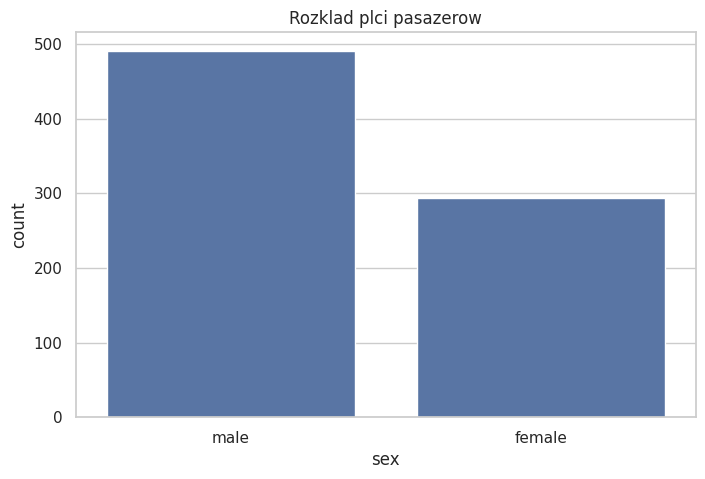

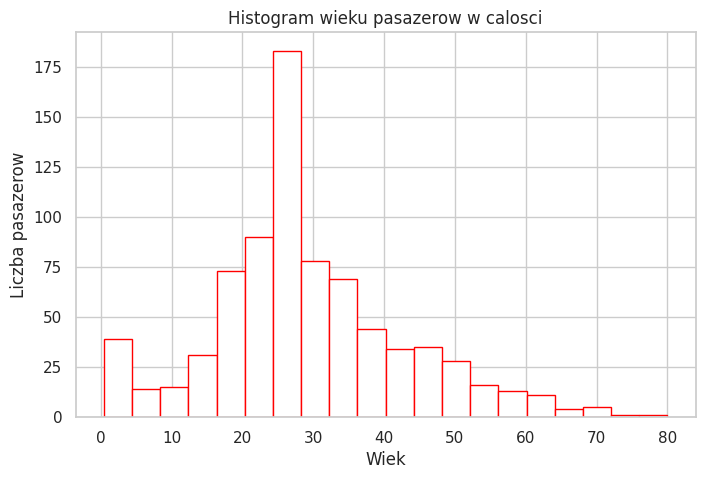

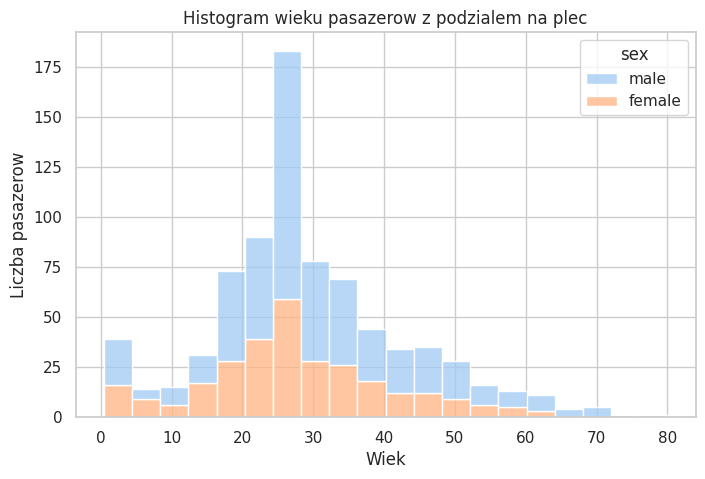

In [18]:
# =============================================
# Analiza częstości
# =============================================

#Przygotuj w formie wykresów analizę kolumny 'sex'.
# Przygotuj w formie histogramów analizy kolumny 'age' w całości oraz z podziałem na płeć.
#Krok histogramu (bind) dobierz według własnego uznania tak aby wykres był w miarę czytelny

sns.countplot(data=df, x='sex')
plt.title('Rozklad plci pasazerow')
plt.show()

plt.hist(df['age'], bins=20, color='white', edgecolor='red')
plt.title('Histogram wieku pasazerow w calosci')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasazerow')
plt.show()

sns.histplot(data=df, x='age', bins=20, hue='sex', multiple='stack', palette='pastel')
plt.title("Histogram wieku pasazerow z podzialem na plec")
plt.xlabel("Wiek")
plt.ylabel("Liczba pasazerow")
plt.show()
#TODO

## Transformacje danych

In [19]:

print("Kształt danych :", df.shape)

Kształt danych : (784, 15)



##Wstępna transformacja danych

In [22]:


# =============================================
# --- Skalowanie kolumn numerycznych ---
# =============================================

print("\nKształt danych przed kodowaniem:", df.shape)

#TODO
from sklearn.preprocessing import StandardScaler

# wybieramy kolumny numeryczne
num_cols = ['age', 'fare', 'sibsp', 'parch']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Dane po skalowaniu (pierwsze 5 wierszy):")
display(df.head())


Kształt danych przed kodowaniem: (784, 15)
Dane po skalowaniu (pierwsze 5 wierszy):


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.557360,0.484009,-0.497157,-0.526825,S,Third,man,True,C,Southampton,no,False
1,1,1,female,0.608298,0.484009,-0.497157,0.701587,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.265945,-0.530599,-0.497157,-0.513876,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,0.389737,0.484009,-0.497157,0.352760,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.389737,-0.530599,-0.497157,-0.511478,S,Third,man,True,C,Southampton,no,True


In [26]:
# =============================================
# --- One-hot encoding ---
# =============================================
#Dla zmiennych kategorycznych takich jak embarked Zastosuj metodę kodowania One-Hot encoding.
#Zastanów się dlaczego kodowanie zmiennych kategorycznych za pomocą liczb naturalnych
#na przykład zamiast A B C zastosowanie 1 2 3 może być złym pomysłem.
#Dla zmiennych kategorycznych dokładnie Przeanalizuj liczebność zbioru danych.
#W rzeczywistych danych często zdarzają się pomyłki typu Cherbourg --> Cherburg
print(df['embarked'].value_counts())
# wybieramy kolumny kategoryczne
cat_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'alone']
# wybieramy kolumny kategoryczne
cat_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'alone']

# tworzymy one-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
# drop_first=True usuwa pierwszą kategorię, aby uniknąć kolinearności (tzw. dummy variable trap)

print("Kształt danych po one-hot encoding:", df.shape)
display(df.head())

#TODO



embarked
S    570
C    155
Q     59
Name: count, dtype: int64
Kształt danych po one-hot encoding: (784, 23)


,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,sex_male,...,class_Third,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,alone_True
0,0,3,-0.557360,0.484009,-0.497157,-0.526825,True,Southampton,no,True,...,True,True,False,False,True,False,False,False,False,False
1,1,1,0.608298,0.484009,-0.497157,0.701587,False,Cherbourg,yes,False,...,False,False,True,False,True,False,False,False,False,False
2,1,3,-0.265945,-0.530599,-0.497157,-0.513876,False,Southampton,yes,False,...,True,False,True,False,True,False,False,False,False,True
3,1,1,0.389737,0.484009,-0.497157,0.352760,False,Southampton,yes,False,...,False,False,True,False,True,False,False,False,False,False
4,0,3,0.389737,-0.530599,-0.497157,-0.511478,True,Southampton,no,True,...,True,True,False,False,True,False,False,False,False,True


In [ ]:
# =============================================
# Podsumowanie
# =============================================
print("""
PODSUMOWANIE:
- Uzupełniono braki danych (mediana dla numerycznych, moda dla kategorycznych).
- Usunięto duplikaty.
- Ujednolicono tekstowe wartości (np. 'embarked').
- Przeanalizowano rozkłady (płeć, wiek).
- Wykonano skalowanie zmiennych numerycznych i zakodowano zmienne kategoryczne.
Preprocessing jest kluczowy, ponieważ dane surowe często zawierają braki, duplikaty
i niespójności – oczyszczone dane pozwalają na lepsze działanie algorytmów ML.
""")
